In [2]:
!pip install scikit-learn
!pip install graphviz
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [31]:
import numpy as np #algebra lineare
import pandas as pd #elaborazione dati
import matplotlib.pyplot as plt #visualizzazione dati
import seaborn as sns #visualizzazione dati

In [32]:
#input dei dati
dataset = pd.read_csv("Placement_Data_Full_Class.train.csv")

In [33]:
#visualizzo le prime 5 righe del dataset
dataset.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,52.0,Central,62.0,Central,Commerce,54.0,Comm&Mgmt,No,72.00,Mkt&HR,55.41,NaN
1,Placed,M,70.0,Central,63.0,Others,Science,70.0,Sci&Tech,Yes,55.00,Mkt&Fin,62.00,300000.0
2,Placed,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,420000.0
3,Placed,M,67.0,Others,63.0,Central,Commerce,72.0,Comm&Mgmt,No,56.00,Mkt&HR,60.41,225000.0
4,Placed,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,400000.0


In [34]:
#stampo la dimensione dei dati
print("Dimensione dataset\n" + "Righe: " + str(dataset.shape[0]) + "\nColonne: " + str(dataset.shape[1]))

Dimensione dataset
Righe: 172
Colonne: 14


In [35]:
#calcolo la percentuale degli occupati nel dataset
print("Numero studenti collocati: " + str(dataset["status"].value_counts()[0]))
print("Numero studenti non collocati: " + str(dataset["status"].value_counts()[1]))
print("Percentuale collocati: " + str(round(dataset["status"].value_counts()[0]/dataset.shape[0]*100, 2)) + "%")

Numero studenti collocati: 117
Numero studenti non collocati: 55
Percentuale collocati: 68.02%


In [36]:
#controllo se ci sono dati mancanti nel dataset
dataset.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64

<AxesSubplot:xlabel='salary', ylabel='Count'>

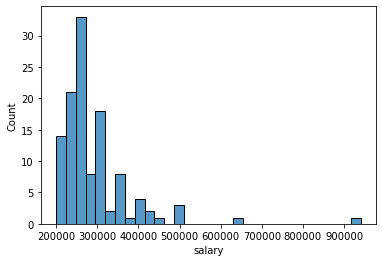

In [37]:
#la feature "salary" è l'unica con valori nulli
#visualizzo come è distribuita
sns.histplot(dataset.salary)

In [38]:
#sostituisco i valori "NaN" con "0"
dataset = dataset.fillna(0)

<AxesSubplot:xlabel='salary', ylabel='Count'>

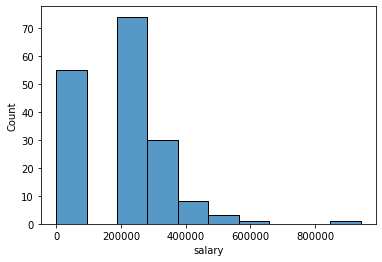

In [39]:
#visualizzo come è distribuita dopo la manipolazione
sns.histplot(dataset.salary)

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

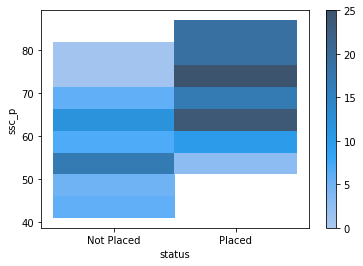

In [40]:
#visualizzo come incide il punteggio di scuola media sulla variabile "status"
sns.histplot(x = dataset["status"], y = dataset["ssc_p"], cbar = "true")

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

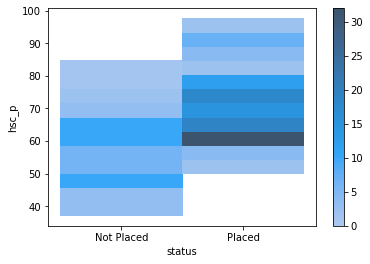

In [41]:
#visualizzo come incide il punteggio di diploma sulla variabile "status"
sns.histplot(x = dataset["status"], y = dataset["hsc_p"], cbar = "true")

<AxesSubplot:xlabel='status', ylabel='degree_p'>

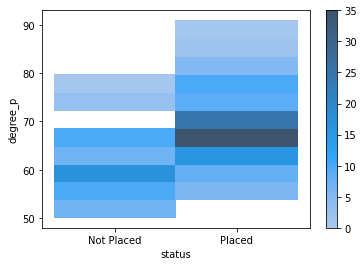

In [42]:
#visualizzo come incide il punteggio di laurea sulla variabile "status"
sns.histplot(x = dataset["status"], y = dataset["degree_p"], cbar = "true")

<AxesSubplot:xlabel='status', ylabel='etest_p'>

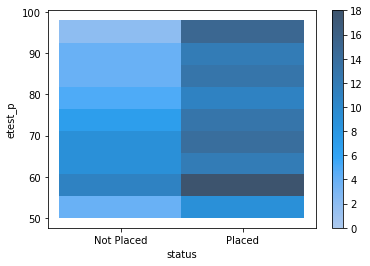

In [43]:
#visualizzo come incide il punteggio del testo di collocabilità sulla variabile "status"
sns.histplot(x = dataset["status"], y = dataset["etest_p"], cbar = "true")

<AxesSubplot:xlabel='status', ylabel='mba_p'>

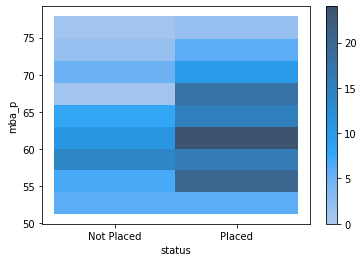

In [44]:
#visualizzo come incide il punteggio dell'MBA sulla variabile "status"
sns.histplot(x = dataset["status"], y = dataset["mba_p"], cbar = "true")

In [45]:
#osservo che il punteggio nella formazione ha un discreto ruolo sul piazzamento degli studenti
#in particolare il punteggio delle scuole medie è quello che incide di più

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

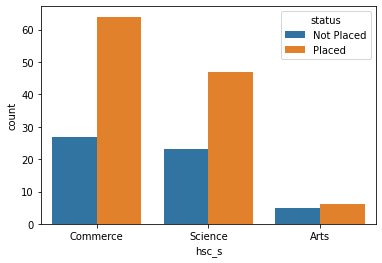

In [46]:
#visualizzo quanto incide la tipologia di liceo sull'occupazione
plt.rc("axes",labelsize=10)
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
sns.countplot(x=dataset["hsc_s"],hue=dataset["status"])

<AxesSubplot:xlabel='degree_t', ylabel='count'>

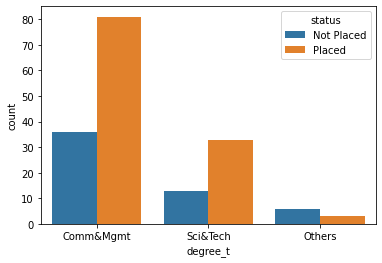

In [47]:
#visualizzo quanto incide il settore disciplinare della laurea sull'occupazione
plt.rc("axes",labelsize=10)
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
sns.countplot(x=dataset["degree_t"],hue=dataset["status"])

<AxesSubplot:xlabel='specialisation', ylabel='count'>

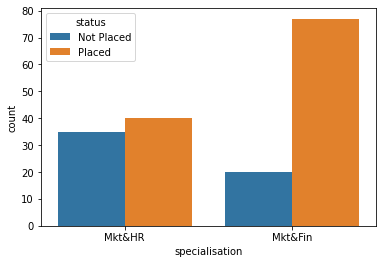

In [48]:
#visualizzo quanto incide la specializzazione post laurea sull'occupazione
plt.rc("axes",labelsize=10)
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
sns.countplot(x=dataset["specialisation"],hue=dataset["status"])

In [49]:
#osservo che la specializzazione post laurea incide molto sull'occupazione
#infatti tra coloro che si sono specializzati in "Mkt&Fin" c'è un numero maggiore di occupati (rapporto 1 : 4)

<AxesSubplot:xlabel='workex', ylabel='count'>

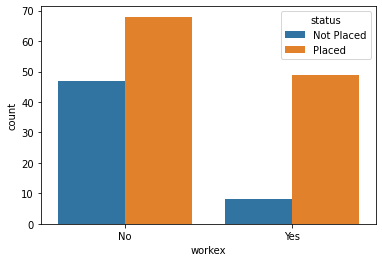

In [50]:
#visualizzo quanto incide l'esperienza lavorativa sull'occupazione
plt.rc("axes",labelsize=10)
plt.rc("xtick",labelsize=10)
plt.rc("ytick",labelsize=10)
sns.countplot(x=dataset["workex"],hue=dataset["status"])

In [51]:
#osservo che la mancanza di esperienza lavorativa non incide sulla collocazione degli studenti
#infatti un buon numero di studenti senza esperienza lavorativa ha comunque trovato lavoro

In [52]:
#stampo il tipo di ogni features
dataset.dtypes

status             object
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [53]:
#posso constatare che 8 features sono categoriche e 6 sono numeriche

In [54]:
#divido il dataset in train e test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.25, random_state=0)

In [55]:
#stampo le dimensioni di train e test set
print("Dimensioni train set: " + str(train.shape))
print("Dimensioni test set: " + str(test.shape))

Dimensioni train set: (129, 14)
Dimensioni test set: (43, 14)


In [56]:
#salvo di dati in due file
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)